In [29]:
import networkx as nx
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [ ]:
file_path = r"C:\Users\daisy\Downloads\multilayer_network.gexf"
try:
    graph = nx.read_gexf(file_path)
    print("\nSample Nodes:")
    nodes = list(graph.nodes(data=True))[:5]
    for node in nodes:
        print(node)
    print("\nSample Edges:")
    edges = list(graph.edges(data=True))[:5]
    for edge in edges:
        print(edge)

except Exception as e:
    print(f"Error loading the GEXF file: {e}")

Graph loaded successfully!

Sample Nodes:
('("Eric Trump just threatened every Republican member of Congress over today\'s vote | liberal_jan_6", \'day1_network_graph\')', {'label': '("Eric Trump just threatened every Republican member of Congress over today\'s vote | liberal_jan_6", \'day1_network_graph\')'})
("('cnn', 'day1_network_graph')", {'label': "('cnn', 'day1_network_graph')"})
("('US Capitol Police officer has died following riot at Capitol | liberal_jan_7', 'day2_network_graph')", {'label': "('US Capitol Police officer has died following riot at Capitol | liberal_jan_7', 'day2_network_graph')"})
("('cnn', 'day2_network_graph')", {'label': "('cnn', 'day2_network_graph')"})
("('Trump supporters protesting the election begin demonstrating in D.C. | conservative_jan_6', 'day1_network_graph')", {'label': "('Trump supporters protesting the election begin demonstrating in D.C. | conservative_jan_6', 'day1_network_graph')"})

Sample Edges:
('("Eric Trump just threatened every Republ

In [23]:
# Function to calculate ACE scores for Reddit nodes
def calculate_ace_scores(graph):
    ace_scores = {}
    for node, attrs in graph.nodes(data=True):
        if '|' in node:  # Reddit node identifier
            neighbors = graph.neighbors(node)
            weights = [graph[node][nbr]['weight'] for nbr in neighbors if 'weight' in graph[node][nbr]]
            ace_scores[node] = np.sum(weights) / len(weights) if weights else 0
    return ace_scores

# Calculate ACE scores
ace_scores = calculate_ace_scores(graph)

# Prepare data for anomaly detection
def prepare_data(ace_scores, graph):
    layers = {n.split(', ')[1] for n in ace_scores.keys()}  # Extract layers
    node_features = []
    nodes = list(ace_scores.keys())
    for node in nodes:
        features = []
        for layer in sorted(layers):
            if layer in node:
                features.append(ace_scores[node])
            else:
                features.append(0)  # Missing layers get 0
        node_features.append(features)
    return np.array(node_features), nodes

node_features, nodes = prepare_data(ace_scores, graph)
scaler = StandardScaler()
node_features_scaled = scaler.fit_transform(node_features)
anomaly_detector = IsolationForest(contamination=0.05, random_state=42)
anomaly_scores = anomaly_detector.fit_predict(node_features_scaled)
anomalies = [nodes[i] for i in range(len(nodes)) if anomaly_scores[i] == -1]
ranked_ace_scores = sorted(ace_scores.items(), key=lambda x: x[1], reverse=True)

# Print results
print("Top 10 Reddit Posts by ACE Score:")3
for node, score in ranked_ace_scores[:20]:
    print(f"{node}: {score}")

print("\nAnomalous Reddit Nodes:")
for anomaly in anomalies:
    print(anomaly)

SyntaxError: unmatched ']' (1945016483.py, line 70)

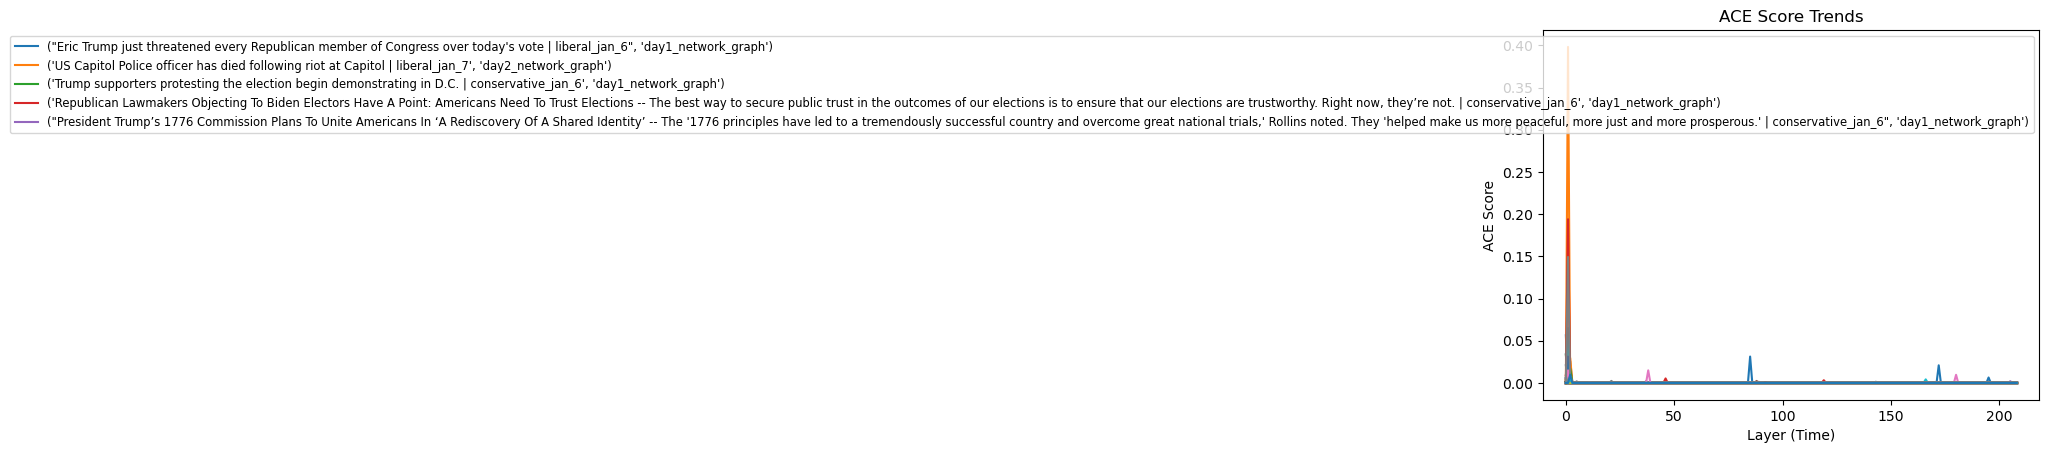

In [5]:
plot_ace_trends(nodes, node_features)

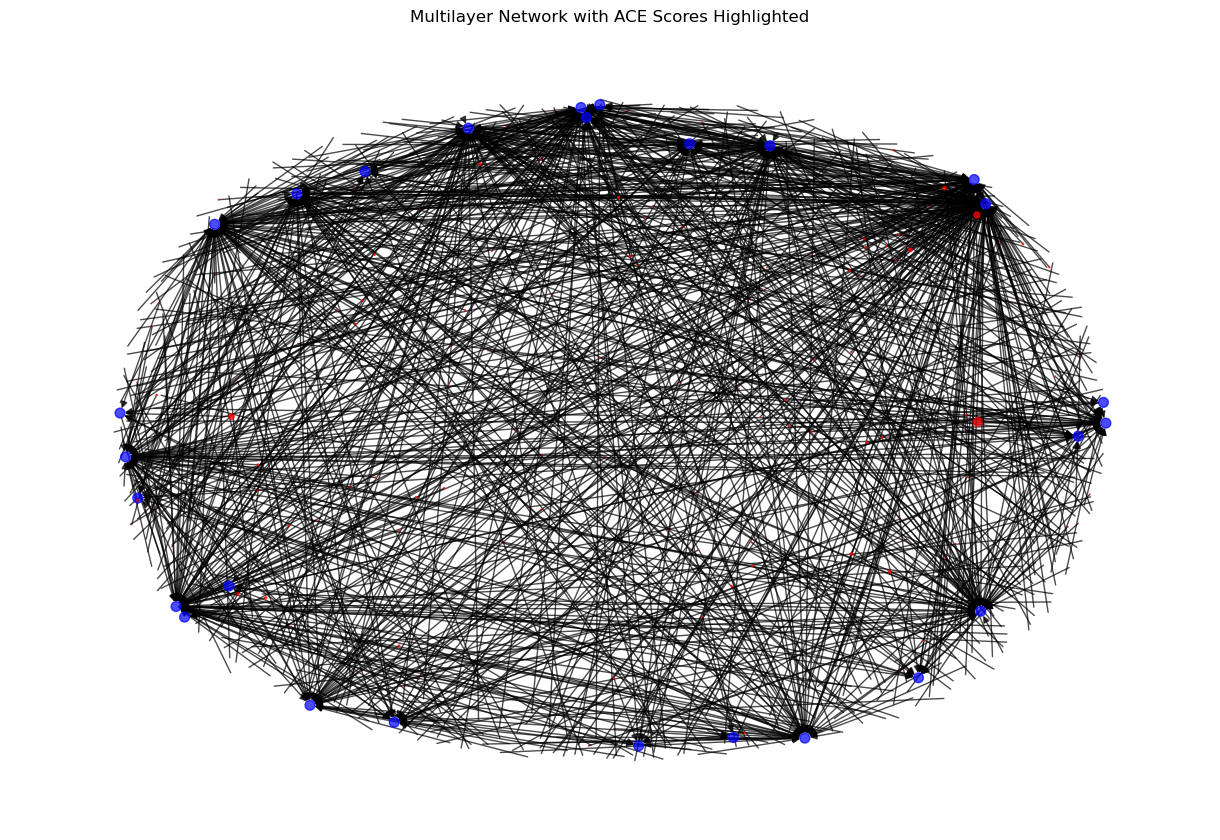

In [6]:
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(graph)

# # Assign colors based on node types
# node_colors = []
# node_sizes = []
# for node, attrs in graph.nodes(data=True):
#     if '|' in node:  # Reddit node
#         color = 'red'
#         size = 100 * ace_scores.get(node, 0)  # Scale size by ACE score
#     else:
#         color = 'blue'
#         size = 50  # Media nodes
#     node_colors.append(color)
#     node_sizes.append(size)
# nx.draw(graph, pos, node_color=node_colors, node_size=node_sizes, with_labels=False, alpha=0.7)
# plt.title("Multilayer Network with ACE Scores Highlighted")
# plt.show()


In [14]:
community_scores = {}

for node, score in ace_scores.items():
    if '|' in node:  # Check for Reddit node
        # Extract subreddit and ignore the rest dynamically
        try:
            subreddit = node.split('|')[1].strip()
            if subreddit not in community_scores:
                community_scores[subreddit] = 0
            community_scores[subreddit] += score
        except IndexError:
            print(f"Skipping malformed node: {node}")

# Rank communities by aggregate ACE scores
ranked_communities = sorted(community_scores.items(), key=lambda x: x[1], reverse=True)
print("\nCommunities Ranked by Aggregate ACE Score:")
for subreddit, total_score in ranked_communities[:20]:
    print(f"{subreddit}: {total_score}")



Communities Ranked by Aggregate ACE Score:
conservative_jan_7', 'day2_network_graph'): 0.4273046812589866
democrats_jan_7', 'day2_network_graph'): 0.2607758620689652
republican_jan_7', 'day2_network_graph'): 0.1492537313432835
politics_jan_6', 'day1_network_graph'): 0.08986970769518286
libertarian_jan_7', 'day2_network_graph'): 0.08388654194327079
libertarian_jan_8', 'day3_network_graph'): 0.0765432098765429
politics_jan_8', 'day3_network_graph'): 0.0661998803111889
conservative_jan_8', 'day3_network_graph'): 0.06080906982736351
liberal_jan_6", 'day1_network_graph'): 0.0564826700898587
politics_jan_7', 'day2_network_graph'): 0.05592100847335842
conservative_jan_6', 'day1_network_graph'): 0.03123933249456211
democrats_jan_8', 'day3_network_graph'): 0.027636524430687502
republican_jan_7", 'day2_network_graph'): 0.0149253731343283
liberal_jan_7', 'day2_network_graph'): 0.0147058823529411
republican_jan_8', 'day3_network_graph'): 0.0146341463414634
democrats_jan_6', 'day1_network_graph'):

In [32]:
import os
notebook_path = os.path.abspath('')
print(f"This notebook is stored at: {notebook_path}")

This notebook is stored at: C:\Users\daisy
